# __*McLaren in the Hybrid Era*__
## __(2014 - Present)__

Hello!

We are going to take a high-level look at McLaren's Formula 1 performance since the introduction of the hybrid engine in 2014.

The data we'll be taking a look at comes from a Formula 1 dataset fonund on Kaggle, which contains race data starting from 1950 and going up to the 2021 season's Austrian Grand Prix (July 4th, 2021).

__[Link to dataset](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020)__

Currently, McLaren is one of the more successful teams and is the favorite to place third in the constructor standings for the 2021 season (behind Mercedes and Red Bull, the two teams fighting for the championship). This team is also the one that I would say is my favorite at the moment, which explains why I gravitated towards them once I started looking at the data.

That said, I am very new to Formula 1, and the current season is the first time that I have been actually watching races each weekend. By focusing on McLaren's recent seasons, this can serve as a small step in exploring the current era of the sport and the team's journey to try and stay competitive with the rest of the grid.

So here, we will be using the Pandas library (along with Matplotlib and Seaborn to help with visualizing the data) to see if we can note McLaren's development as a racing team within the last eight years.

In [70]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display
import seaborn as sns

# Defining graph styles
plt.style.use('ggplot')

In [71]:
# Read in the data - Here, we are assuming that the data is in the same directory,
# but this can be changed to point to where the files are stored locally
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
lap_times = pd.read_csv('lap_times.csv')
status = pd.read_csv('status.csv')

In [72]:
# Displaying the top of each dataset we read in to verify that it looks correct

# Race result DataFrame
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [73]:
# Races DataFrame
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [74]:
# Constructors DataFrame
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [75]:
# Constructor standings DataFrame
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [76]:
# Lap times DataFrame
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [77]:
# Status DataFrame
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Now that we have imported the data, let's see if we can find McLaren in the list of constructors.

In [78]:
# Getting information on McLaren from the list of constructors
constructors[constructors['name'] == 'McLaren']

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


With the above, we know that McLaren has a **constructorId** of **1**, which we can use to filter out data that is not related to the team.

# __Constructor Standings and Podium Finishes__
Now, let's take a look at how the team ranks in the constructor standings from 2014-2021.

In [79]:
# Joining the constructor standings and list of races
mclaren_standings = constructor_standings.merge(races, on='raceId')
mclaren_standings = mclaren_standings[(mclaren_standings['constructorId'] == 1) & (mclaren_standings['year'] >= 2014)]

# Convert the date column to datetime type
mclaren_standings['date'] = pd.to_datetime(mclaren_standings['date'])

# Getting the last date each season (and the last race with results in the 2021 season)
# to get the constructor standings for each year
last_race_each_season = mclaren_standings[['year', 'raceId', 'date']][mclaren_standings['date'] <= '2021-07-04']
last_race_each_season = last_race_each_season.groupby(['year']).max().reset_index()

# Joining the last race each season with McLaren's ranking to obtain the team standing at the last
# race of each season
mclaren_standings = mclaren_standings.merge(last_race_each_season, on='raceId')[['year_x', 'raceId', 'points', 'position', 'wins', 'date_x']]
mclaren_standings.rename(columns={'year_x': 'year', 'date_x': 'date_of_last_race', 
                        'position': 'constructor_standing'}, inplace=True)

# Displaying the year with McLaren's ranking that year
mclaren_standings[['year', 'constructor_standing', 'points', 'wins']]

,year,constructor_standing,points,wins
0,2014,5,181.0,0
1,2015,9,27.0,0
2,2016,6,76.0,0
3,2017,9,30.0,0
4,2018,6,62.0,0
5,2019,4,145.0,0
6,2020,3,202.0,0
7,2021,3,141.0,0


Starting in 2019, McLaren has improved their ranking in the constructor's championship compared to the previous years, and 2021 also looks to have a strong start with the team on track to match 2020's third place ranking.

We can also see that the team has not won a race within this period of time, so instead of exploring McLaren's performance through race wins, we can take a look at how many podiums the team has achieved starting from the 2014 season.

In [80]:
# Join the list of races with the results table to get all McLaren race results from 2014-Present
results_hybrid_era = races.merge(results, on='raceId')
results_hybrid_era = results_hybrid_era[(results_hybrid_era["year"] >= 2014) & (results_hybrid_era["constructorId"] == 1)]

# Dropping columns not being used
results_hybrid_era.drop(columns={'circuitId', 'date', 'time_x', 'url', #'position', 
                        'positionText', 'time_y', 'milliseconds', 'fastestLap', 'fastestLapTime',
                        'fastestLapSpeed'}, inplace=True)

# Uncommenting the below line will display the resulting list of McLaren's race results from 2014-2021:
# results_hybrid_era.head()

,year,number_of_podiums
0,2014,2
1,2015,0
2,2016,0
3,2017,0
4,2018,0
5,2019,1
6,2020,2
7,2021,3


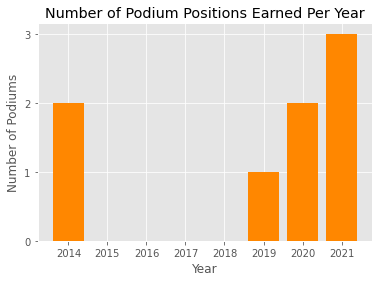

In [81]:
# Getting the number of podiums each year by getting the list of years and
# joining (using a left join) it with number of top 3 finishes. This allows 
# years without podium finishes to be included with zero as the number of podiums.
count_podiums = results_hybrid_era[results_hybrid_era['positionOrder'] <= 3].groupby('year')['positionOrder'].count().reset_index()
year_list = results_hybrid_era['year'].drop_duplicates().to_frame()
count_podiums = year_list.merge(count_podiums, how='left', on='year').fillna(0).astype(int)
count_podiums.rename(columns={'positionOrder': 'number_of_podiums'}, inplace=True)
display(count_podiums)

# Use a bar chart to display the number of podiums each year
plt.figure()
plt.bar(count_podiums['year'], count_podiums['number_of_podiums'], color='#FF8700')
plt.title('Number of Podium Positions Earned Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Podiums')
plt.ylim(1, None)
plt.yticks(range(0, count_podiums['number_of_podiums'].max() + 1))
plt.show()

After 2014, the team failed to finish in the top 3 positions for four years until 2019, and the current season seems to be their strongest yet in terms of finishing races closer to the front. Even though the 2021 season is not over, McLaren has already achieved the more podiums than any other year within this period.

# __Distribution of Race Results__

Now, let's take a look at the frequencies of each race result that the team achieved to see if we can gain any additional insights.

In [82]:
# Joining the races DataFrame with the results DataFrame so that we can get the year of each race result
results_all_teams = races.merge(results, on='raceId')
results_all_teams = results_all_teams[results_all_teams['year'] >= 2014]

# The below line of code can be uncommented to display the top 5 rows in the results DataFrame joined
# with the races DataFrame

# results_all_teams.head()

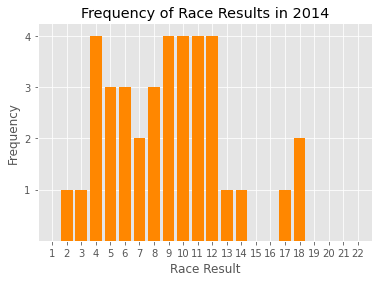

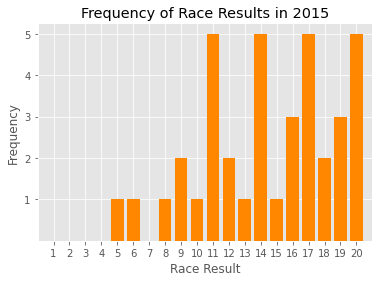

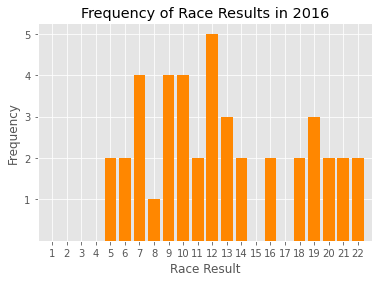

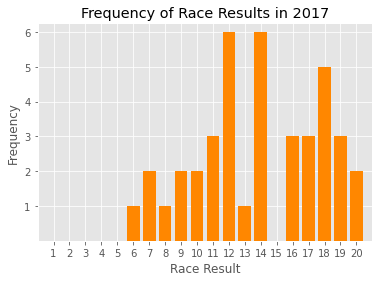

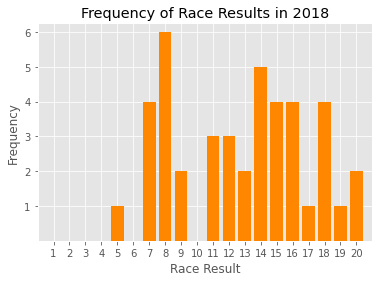

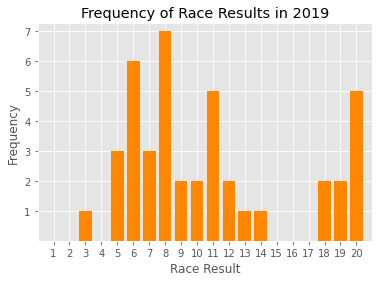

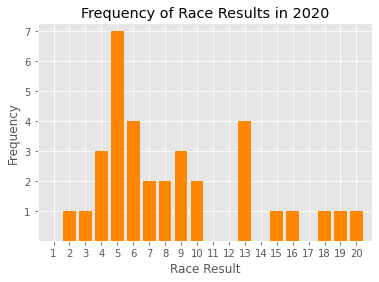

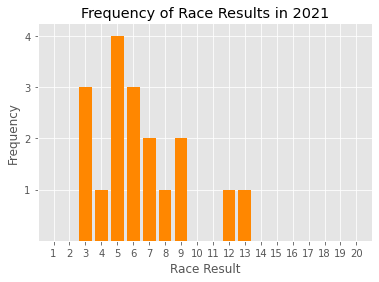

In [83]:
# Getting the number of drivers that participated by getting the
# highest position number that a driver placed in each year.
number_of_drivers = results_all_teams.groupby('year')['positionOrder'].max().reset_index()

# Frequency of race results from 2014 - 2021
for i in range(2014, 2022):
    plt.figure()
    # Get the races within each year and group by the position that the drivers finished in
    df = results_hybrid_era[results_hybrid_era['year'] == i].groupby('positionOrder')['raceId'].count().reset_index()
    df.rename(columns={'positionOrder': 'race_result', 
                'raceId': 'frequency'}, inplace=True)
    
    # Getting the number of the drivers in the year that is being visualized by using the
    # value calculated for the number_of_drivers DataFrame. This will set the limit of the x-axis.
    driver_count_this_year = number_of_drivers[number_of_drivers['year'] == i]['positionOrder'].item()

    # Plotting the year's race results in a bar graph
    plt.bar(df['race_result'], df['frequency'], color='#FF8700')
    plt.xlabel('Race Result')
    plt.ylabel('Frequency')

    # Setting the limits of the x and y axes. 0.25 is added to the y-axis limit because we want
    # a little space above the max value so that the bars are not touching the top border
    plt.xlim(0, driver_count_this_year + 1)
    plt.xticks(range(1, driver_count_this_year + 1))
    plt.ylim(0, (df['frequency'].max() + 0.25))
    plt.yticks(range(1, (df['frequency'].max() + 1)))
    plt.title('Frequency of Race Results in %d' % i)
    plt.show()
    i += 1

2015 seems like a year that McLaren noticeably struggled, especially compared to their results in the previous year, where the team went from having a majority of their finishes in the top 10 to primarily finishing out of the points.

On the other hand, 2019 is the year that the team's results start to skew towards the left side of the graph, showing their gradual improvement that continues in the years afterwards. One thing that should be noted is that the lack of race result data in 2021 is made more obvious here due to only having nine races worth of data, but the team looks to have a strong start to the year, and both drivers are consistently finishing in the top 10 with only two exceptions.

# __DNFs__

Since we have the race results of the team, let's take a quick look at the amount of times a McLaren driver was unable to finish the race in the hybrid era.

To do this, we can first take a look at the list of statuses that can be assigned to each race result.

In [101]:
# Getting unique status descriptors
display(status['status'].unique())

array(['Finished', 'Disqualified', 'Accident', 'Collision', 'Engine',
       'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical',
       '+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Laps',
       '+7 Laps', '+8 Laps', '+9 Laps', 'Spun off', 'Radiator',
       'Suspension', 'Brakes', 'Differential', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+17 Laps', 'Oil pressure', '+42 Laps', '+13 Laps',
       'Withdrew', '+12 Laps', 'Engine fire', 'Engine misfire',
       '+26 Laps', 'Tyre puncture', 'Out of fuel', 'Wheel nut',
       'Not classified', 'Pneumatics', 'Handling', 'Rear wing', 'Fire',
       'Wheel bearing', 'Physical', 'Fuel sys

I am not 100% sure what some of these status descriptions are referring to, but there are a number of them that seem to indicate that a driver finished a race. Specifically, I am referring to the descriptors __Finished__ along with any of the statuses that have the format __+x Laps__, where __x__ refers to the number of laps that the driver is behind the race leader.

Importantly, the results DataFrame seems to display a position value of __\N__ (newline character) for race results that resulted in a DNF, but to make sure that the value is not missing for a different reason, we will want to verify that the race result's statusId also indicates that the driver did not finish the race.

In [112]:
# Getting statusId vaules that indicate that the driver did not finish the race
dnf_status = status[(status['status'] != 'Finished') & (~status['status'].str.contains('Lap'))]
display(dnf_status.head())
# display(status[(status['status'] == 'Finished') | (status['status'].str.contains('Lap'))])

,statusId,status
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox


In [125]:
# Getting the amount of McLaren DNFs from 2014 - 2021
mclaren_dnfs_yearly = results_hybrid_era[(results_hybrid_era['position'] == '\\N') & (results_hybrid_era['statusId'].isin(dnf_status['statusId']))].groupby('year')['position'].count().reset_index()
mclaren_dnfs_yearly.rename(columns={'position': 'count_dnfs'}, inplace=True)

# Left Join the list of years with the amount of DNFs to get years where the count is zero
mclaren_dnfs_yearly = year_list.merge(mclaren_dnfs_yearly, how='left', on='year').fillna(0).astype(int)

display(mclaren_dnfs_yearly)

,year,count_dnfs
0,2014,2
1,2015,14
2,2016,9
3,2017,15
4,2018,8
5,2019,8
6,2020,4
7,2021,0


# __Average Performance__

If we take a look at the average finishing position and points gained per race, we may be able to gleam more information that isn't clear from the race result frequency.

In [85]:
# Calculating the average of the team's finishing positions
# and average points scored
average_race_results = results_hybrid_era.groupby('year')['positionOrder'].mean().reset_index()
average_points_scored = results_hybrid_era.groupby('year')['points'].mean().reset_index()

average_race_results = average_race_results.merge(average_points_scored, on='year')

# sum_race_results = results_hybrid_era.groupby('year')['points'].sum().reset_index()
# display(sum_race_results)

# Rename columns to reflect the calculated values
average_race_results.rename(columns={'positionOrder': 'average_position', 
                'points': 'average_points_scored'}, inplace=True)

# Round the averages to the nearest tenth and display the DataFrame
average_race_results = average_race_results.round(1)
average_race_results

,year,average_position,average_points_scored
0,2014,8.9,4.8
1,2015,14.5,0.7
2,2016,12.7,1.8
3,2017,13.8,0.8
4,2018,12.8,1.5
5,2019,10.7,3.5
6,2020,8.6,5.9
7,2021,6.4,7.8


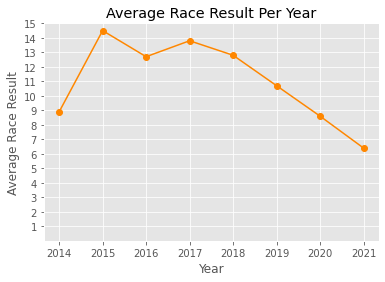

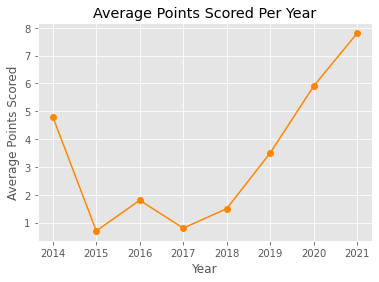

In [86]:
# Plot the average finishing position for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_position'], 'o-', color='#FF8700')
plt.title('Average Race Result Per Year')
plt.xlabel('Year')
plt.ylabel('Average Race Result')
plt.ylim(0, None)
plt.yticks(range(1, (math.ceil(average_race_results['average_position'].max()) + 1)))
plt.show()

# Plot the average points scored (per race) for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_points_scored'], 'o-', color='#FF8700')
plt.title('Average Points Scored Per Year')
plt.xlabel('Year')
plt.ylabel('Average Points Scored')
plt.show()

After a sharp decline in 2015, there are significant improvements in the average amount of points scored per race starting in 2019. Starting in 2020, the average race result that the drivers are finishing in lands within the top 10, which indicates that the team is scoring points more consistently in recent seasons.

# __Lap Times__

Now, let's take a look at the team's race pace compared with the rest of the grid.

*__NOTE:__ The code below used to get the average lap times for the team is repurposed from the* ``exploring_lap_times.ipynb`` *Jupyter Notebook file, which took a look at the outliers in the list of lap times. That file goes a little more in depth on my approach to getting a more accurate average lap time and can be referenced for more information.*

In [87]:
# Getting the lap times from 2014 - 2021
hybrid_era_lap_times = lap_times[['raceId','driverId','lap','time', 'milliseconds']]
hybrid_era_lap_times = hybrid_era_lap_times.merge(races[['raceId', 'year', 'name']], on='raceId')
hybrid_era_lap_times = hybrid_era_lap_times[hybrid_era_lap_times['year'] >= 2014]

# Calculating the average lap time and standard deviation (lap time in milliseconds)
driver_average_lap = hybrid_era_lap_times.groupby(['driverId', 'raceId'])['milliseconds'].mean().reset_index()
driver_std = hybrid_era_lap_times.groupby(['driverId', 'raceId'])['milliseconds'].std().reset_index()

# Getting the number of laps completed in the race. This could also be obtained from the results file
# if that is imported
driver_laps_completed = hybrid_era_lap_times.groupby(['driverId', 'raceId'])['lap'].max().reset_index()

# Rename columns to be more descriptive
driver_average_lap.rename(columns={'milliseconds': 'driver_average_lap_time'}, inplace=True)
driver_std.rename(columns={'milliseconds': 'standard_deviation'}, inplace=True)
driver_laps_completed.rename(columns={'lap': 'laps_completed'}, inplace=True)

# Join the DataFrames
driver_average_lap = driver_average_lap.merge(driver_std, on=['driverId', 'raceId'])
driver_average_lap = driver_average_lap.merge(driver_laps_completed, on=['driverId', 'raceId'])

# Calculating the z-score and displaying lap times with a high enough z-score to be excluded (z-score > 3)
hybrid_era_zscore = hybrid_era_lap_times.merge(driver_average_lap, on=['driverId', 'raceId'])
hybrid_era_zscore['z-score'] = (hybrid_era_zscore['milliseconds'] - hybrid_era_zscore['driver_average_lap_time']) / hybrid_era_zscore['standard_deviation']
hybrid_era_zscore = hybrid_era_zscore.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'])
display(hybrid_era_zscore[hybrid_era_zscore['z-score'] > 3])

,raceId,driverId,lap,time,milliseconds,year,name,driver_average_lap_time,standard_deviation,laps_completed,z-score,constructorId
12,900,3,13,2:29.953,149953,2014,Australian Grand Prix,97872.105263,12238.517779,57,4.255490,131
13,900,3,14,2:21.208,141208,2014,Australian Grand Prix,97872.105263,12238.517779,57,3.540943,131
68,900,817,12,2:15.227,135227,2014,Australian Grand Prix,98302.368421,11523.364155,57,3.204327,9
69,900,817,13,2:22.548,142548,2014,Australian Grand Prix,98302.368421,11523.364155,57,3.839645,9
70,900,817,14,2:20.721,140721,2014,Australian Grand Prix,98302.368421,11523.364155,57,3.681098,9
...,...,...,...,...,...,...,...,...,...,...,...,...
160510,1060,849,1,1:55.251,115251,2021,Austrian Grand Prix,72540.628571,7905.283211,70,5.402763,3
160511,1060,849,2,1:49.943,109943,2021,Austrian Grand Prix,72540.628571,7905.283211,70,4.731313,3
160512,1060,849,3,1:36.821,96821,2021,Austrian Grand Prix,72540.628571,7905.283211,70,3.071411,3
160580,1060,853,1,1:57.036,117036,2021,Austrian Grand Prix,73790.971014,8230.355832,69,5.254333,210


In [88]:
# Excluding lap times more than 3 standard deviations from the mean
hybrid_era_averages = hybrid_era_zscore[hybrid_era_zscore['z-score'] <= 3]

# Getting the average lap time for each race with the filtered DataFrame
hybrid_era_averages = hybrid_era_averages.groupby('raceId')['milliseconds'].mean().reset_index()

# Renaming the average lap time column to a more appropriate descriptor
hybrid_era_averages.rename(columns={'milliseconds': 'average_lap_time_all_drivers'}, inplace=True)

# Assigning the year and race name to each lap time
hybrid_era_averages = races[['raceId', 'year', 'name']].merge(hybrid_era_averages, on='raceId')
display(hybrid_era_averages)

,raceId,year,name,average_lap_time_all_drivers
0,900,2014,Australian Grand Prix,98132.791895
1,901,2014,Malaysian Grand Prix,109092.588235
2,902,2014,Bahrain Grand Prix,104147.573446
3,903,2014,Chinese Grand Prix,105146.426095
4,904,2014,Spanish Grand Prix,93173.310687
...,...,...,...,...
142,1056,2021,Monaco Grand Prix,77051.241130
143,1057,2021,Azerbaijan Grand Prix,116355.418024
144,1058,2021,Styrian Grand Prix,70729.873117
145,1059,2021,French Grand Prix,100027.108161


In [89]:
# Calculating McLaren's average lap times for each race
mclaren_average_laps = hybrid_era_zscore[(hybrid_era_zscore['z-score'] <= 3) & (hybrid_era_zscore['constructorId'] == 1)]
mclaren_average_laps = mclaren_average_laps.groupby('raceId')['milliseconds'].mean().reset_index()

# Renaming McLaren's average lap time column to a more appropriate descriptor and assigning the year and race name
# to each lap time
mclaren_average_laps.rename(columns={'milliseconds': 'mclaren_average_lap_time'}, inplace=True)
mclaren_average_laps = races[['raceId', 'year', 'name']].merge(mclaren_average_laps, on='raceId')

# Merging the DataFrames to get the gap between McLaren's average lap time and the average lap time of the entire grid
# for each race
lap_time_comparison = mclaren_average_laps.merge(hybrid_era_averages, on=['raceId', 'year', 'name'])
lap_time_comparison['mclaren_gap_to_average_seconds'] = (lap_time_comparison['mclaren_average_lap_time'] - lap_time_comparison['average_lap_time_all_drivers']) / 1000
lap_time_comparison['mclaren_gap_to_average_seconds'] = lap_time_comparison['mclaren_gap_to_average_seconds'].round(3)

# Sort by raceId, which, for the values we are looking at, is sufficient for ordering the races in chronological order
lap_time_comparison.sort_values(by='raceId', inplace=True)
display(lap_time_comparison)

,raceId,year,name,mclaren_average_lap_time,average_lap_time_all_drivers,mclaren_gap_to_average_seconds
0,900,2014,Australian Grand Prix,96242.092593,98132.791895,-1.891
1,901,2014,Malaysian Grand Prix,108379.584906,109092.588235,-0.713
2,902,2014,Bahrain Grand Prix,104365.428571,104147.573446,0.218
3,903,2014,Chinese Grand Prix,105503.962264,105146.426095,0.358
4,904,2014,Spanish Grand Prix,93163.600000,93173.310687,-0.010
...,...,...,...,...,...,...
142,1056,2021,Monaco Grand Prix,76629.019868,77051.241130,-0.422
143,1057,2021,Azerbaijan Grand Prix,116742.440000,116355.418024,0.387
144,1058,2021,Styrian Grand Prix,70637.043796,70729.873117,-0.093
145,1059,2021,French Grand Prix,99687.813725,100027.108161,-0.339


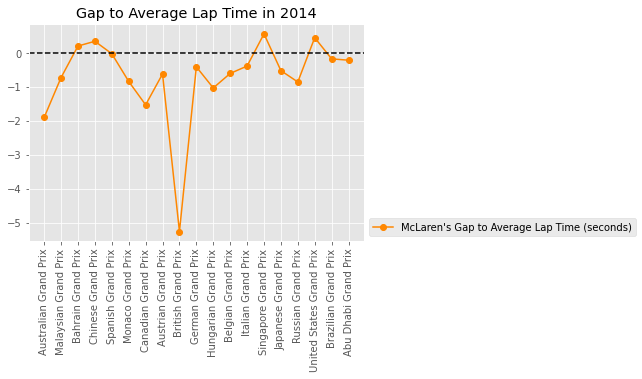

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
0,2014,15,19,0.789


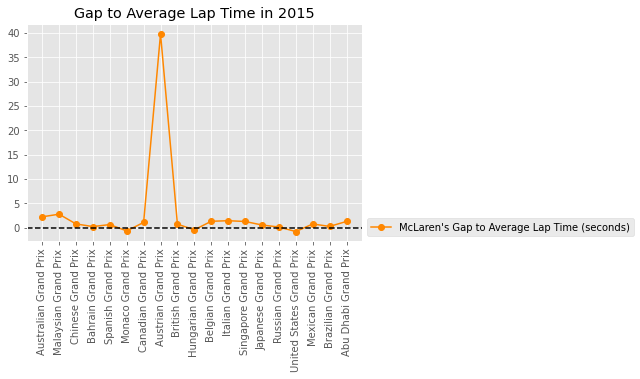

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
1,2015,3,19,0.158


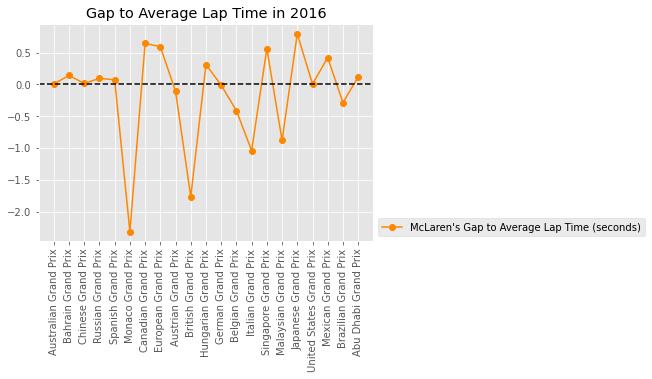

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
2,2016,8,21,0.381


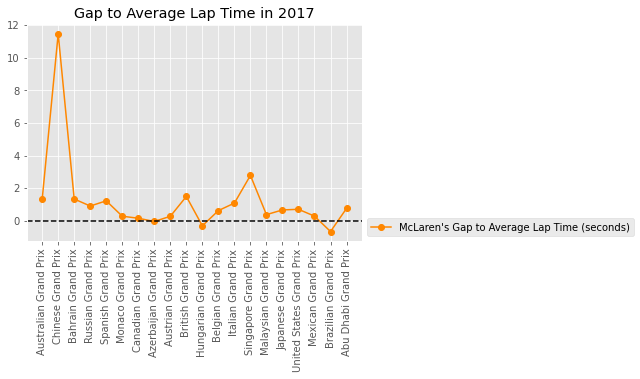

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
3,2017,3,20,0.15


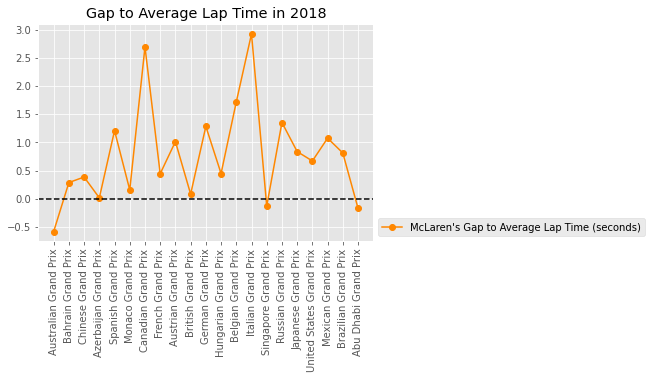

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
4,2018,3,21,0.143


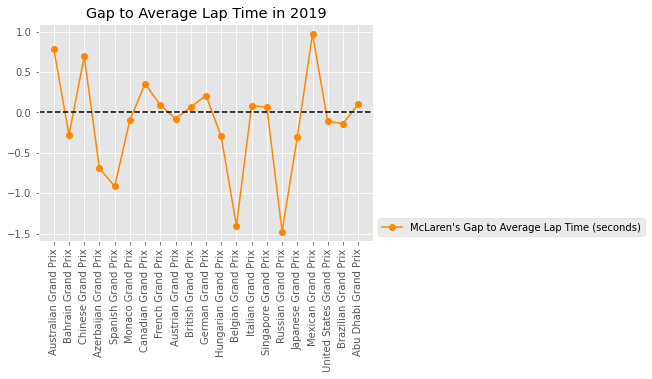

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
5,2019,11,21,0.524


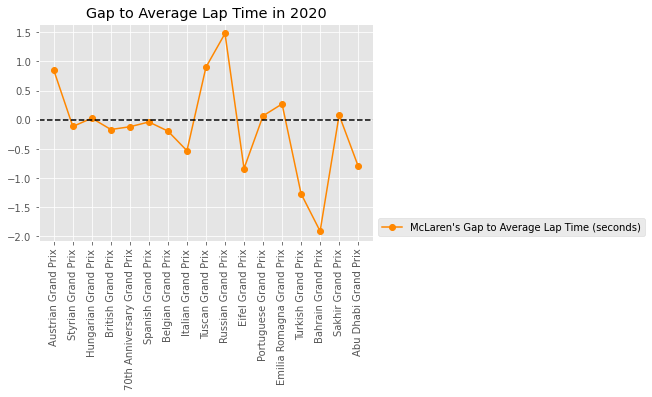

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
6,2020,10,17,0.588


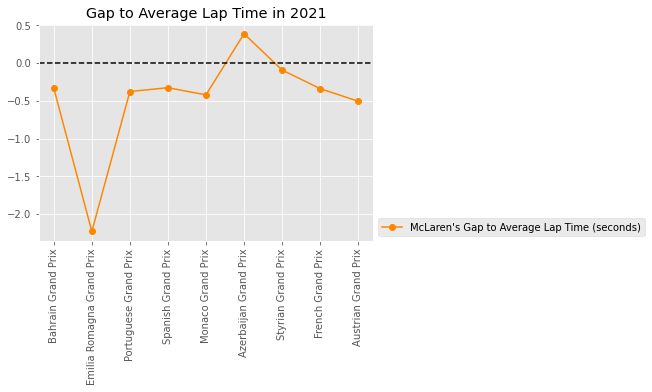

,year,num_races_faster_than_average,total_race_results,percentage_races_faster_than_average
7,2021,8,9,0.889


In [131]:
# If the difference is negative, then McLaren's average lap time is faster than the average lap time of the entire grid
mclaren_count_faster_than_average = lap_time_comparison[lap_time_comparison['mclaren_gap_to_average_seconds'] < 0].groupby('year')['mclaren_gap_to_average_seconds'].count().reset_index()
mclaren_count_faster_than_average.rename(columns={'mclaren_gap_to_average_seconds': 'num_races_faster_than_average'}, inplace=True)

# Getting the total amount of race results each year
total_race_results = lap_time_comparison.groupby('year')['mclaren_gap_to_average_seconds'].count().reset_index()
total_race_results.rename(columns={'mclaren_gap_to_average_seconds': 'total_race_results'}, inplace=True)

# Merging the DataFrames
mclaren_count_faster_than_average = mclaren_count_faster_than_average.merge(total_race_results, on='year')

# Dividing the amount of races where McLaren is faster than the average by the total amount of race results to get
# the percentage (in decimal form)
mclaren_count_faster_than_average['percentage_races_faster_than_average'] = mclaren_count_faster_than_average.apply(lambda x: x['num_races_faster_than_average'] / x['total_race_results'], axis=1)
mclaren_count_faster_than_average['percentage_races_faster_than_average'] = mclaren_count_faster_than_average['percentage_races_faster_than_average'].round(3)

# Plotting the gap between McLaren's average lap time and the overall average lap time
for i in range(2014, 2022):
        plt.figure()
        plt.plot(lap_time_comparison[lap_time_comparison['year'] == i]['name'], 
                lap_time_comparison[lap_time_comparison['year'] == i]['mclaren_gap_to_average_seconds'], 
                'o-', color='#FF8700')
        
        # Plotting a dashed line on y=0. This line represents the average lap times being equal. If the gap is above this dashed line,
        # McLaren's average is slower than the overall average. If the gap is below the dashed line, McLaren's average is faster than
        # the overall average
        plt.axhline(y=0, color='black', linestyle='dashed')

        # Displaying a legend
        plt.legend(['McLaren\'s Gap to Average Lap Time (seconds)'], bbox_to_anchor=(1,0), loc='lower left')

        # Titling each plot according to the year.
        plt.title('Gap to Average Lap Time in %d' % i)

        # Rotating the Race Names on the x-axis so that they fit
        plt.xticks(rotation=90)
        plt.show()
        
        # Display the amount/percentage of races where McLaren's average is faster than the overall average
        display(mclaren_count_faster_than_average[mclaren_count_faster_than_average['year'] == i])

Above, we are displaying a line plot of the gap between McLaren's average lap time to the average lap time of the entire grid for each race. Below the plots for each year, the number of races that season where McLaren's average lap time is less than the overall average lap time is displayed (along with the percentage of races that McLaren perform better than the average lap time).

As expected, the team generally compares better against the average lap time in seasons that they get better results in (e.g. In 2014 and 2019 - 2021, the team performs better than the average in a higher percentage of races than 2015 - 2018). On the other hand, one interesting observation is that 2014 has the highest percentage of races where the team is faster than the average lap time (excluding the 2021 season, which is incomplete). While the team performed relatively well this season, a lot of the values that we looked at indicate that the team is performing better in the recent seasons (according to the constructor standings).

There are also a couple of outliers here that I am interested in looking more into, notably when the time gap has double digits, which applies to the Austrian Grand Prix in 2015 and the Chinese Grand Prix in 2017

In [127]:
double_digit_outliers = lap_time_comparison[abs(lap_time_comparison['mclaren_gap_to_average_seconds']) >= 5]

display(double_digit_outliers)

hybrid_era_zscore[hybrid_era_zscore['constructorId'] == 1].loc[hybrid_era_zscore['raceId'].isin(double_digit_outliers['raceId'])]
# hybrid_era_zscore[hybrid_era_zscore['raceId'] == 933]


,raceId,year,name,mclaren_average_lap_time,average_lap_time_all_drivers,mclaren_gap_to_average_seconds
8,908,2014,British Grand Prix,101307.843137,106570.245283,-5.262
26,933,2015,Austrian Grand Prix,115883.375000,76028.821042,39.855
60,970,2017,Chinese Grand Prix,116425.260000,104958.649022,11.467


,raceId,driverId,lap,time,milliseconds,year,name,driver_average_lap_time,standard_deviation,laps_completed,z-score,constructorId
9476,908,18,1,2:16.405,136405,2014,British Grand Prix,170374.692308,499187.445428,52,-0.068050,1
9477,908,18,2,1:01:40.606,3700606,2014,British Grand Prix,170374.692308,499187.445428,52,7.071955,1
9478,908,18,3,1:41.050,101050,2014,British Grand Prix,170374.692308,499187.445428,52,-0.138875,1
9479,908,18,4,1:41.612,101612,2014,British Grand Prix,170374.692308,499187.445428,52,-0.137749,1
9480,908,18,5,1:41.226,101226,2014,British Grand Prix,170374.692308,499187.445428,52,-0.138522,1
...,...,...,...,...,...,...,...,...,...,...,...,...
67115,970,838,13,1:42.592,102592,2017,Chinese Grand Prix,126416.470588,25433.449860,17,-0.936738,1
67116,970,838,14,1:42.114,102114,2017,Chinese Grand Prix,126416.470588,25433.449860,17,-0.955532,1
67117,970,838,15,1:41.460,101460,2017,Chinese Grand Prix,126416.470588,25433.449860,17,-0.981246,1
67118,970,838,16,1:44.841,104841,2017,Chinese Grand Prix,126416.470588,25433.449860,17,-0.848311,1


# __Correlations__

With the values that we've used to track McLaren's performance over time, we can use a heatmap to note any strong correlations between variables.

,Year,Average Position,Average Points Scored,Number of Podiums,raceId,Total Points Scored,Constructor Standing
0,2014,8.9,4.8,2,918,181.0,5
1,2015,14.5,0.7,0,945,27.0,9
2,2016,12.7,1.8,0,968,76.0,6
3,2017,13.8,0.8,0,988,30.0,9
4,2018,12.8,1.5,0,1009,62.0,6
5,2019,10.7,3.5,1,1030,145.0,4
6,2020,8.6,5.9,2,1047,202.0,3
7,2021,6.4,7.8,3,1060,141.0,3


,Year,Average Position,Average Points Scored,Number of Podiums,raceId,Total Points Scored,Constructor Standing
Year,1.000000,-0.548849,0.589327,0.487950,0.996343,0.357425,-0.647546
Average Position,-0.548849,1.000000,-0.992189,-0.978997,-0.485378,-0.864172,0.891865
Average Points Scored,0.589327,-0.992189,1.000000,0.983593,0.526032,0.840747,-0.878602
Number of Podiums,0.487950,-0.978997,0.983593,1.000000,0.417688,0.825604,-0.801253
raceId,0.996343,-0.485378,0.526032,0.417688,1.000000,0.315412,-0.613319
Total Points Scored,0.357425,-0.864172,0.840747,0.825604,0.315412,1.000000,-0.884076
Constructor Standing,-0.647546,0.891865,-0.878602,-0.801253,-0.613319,-0.884076,1.000000


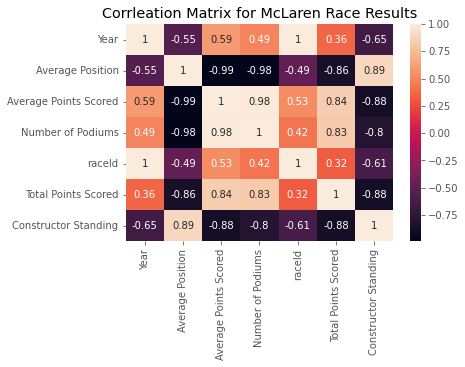

In [92]:
# Joining the calculated averages (points and finishing positions) with other overall 
# results for the team each year (constructor standings, total points)
yearly_results = average_race_results.merge(count_podiums, on='year')
yearly_results = yearly_results.merge(mclaren_standings, on='year')

# Dropping unnecessary values:
# 1. The team has no wins within this period, so there is no correlation
# 2. The results being compared are calculated by year, so the date of the last race 
#       of the season is not needed.
yearly_results.drop(columns={'wins', 'date_of_last_race'}, inplace=True)

# Renaming the columns to clean up the formatting of the axes of the heatmap
yearly_results.rename(columns={'year':'Year', 'average_position':'Average Position', 
                        'average_points_scored':'Average Points Scored','number_of_podiums':'Number of Podiums', 
                        'points':'Total Points Scored', 'constructor_standing':'Constructor Standing'}, inplace=True)

# Displaying the yearly results along with the correlation matrix and heatmap
display(yearly_results)
display(yearly_results.corr())
plt.figure()
sns.heatmap(yearly_results.corr(), annot=True)
plt.title('Corrleation Matrix for McLaren Race Results')
plt.show()

There's a number of things that we can observe from the heatmap:
- The __raceId__ is not quite as useful to us as some of the other values. Generally, more recent races will have a higher raceId assigned than older races, so the perfect positive correlation with the year is expected.
- For the __average and total points scored__, there are strong negative correlations with the __average position__ and the __constructor standing__ variables along with strong positive correlations with the __number of podiums__. This is not a surprise because the team scoring more points means that they are achieving better (lower) finishing positions, and therefore, their ranking in the constructor standings would also be lower.
    - One thing to point out with the __average points scored__ is that there is a moderate positive correlation with the __year__, which lines up with the team's improvement in recent seasons.
    - The __total points scored__ has a weaker correlation than the average, which could be explained by the dropoff in McLaren's points in 2015 compared with the previous year. With the current season still incomplete, the total points in 2021 is also lower than in 2019 and 2020, which contributes to the lower correlation.
    - Along with what was previously mentioned, it follows that the __constructor standing__ and __average_position__ have a negative correlation with the __year__, and the __number of podiums__ has a slight positive corrleation with the __year__. The team has been doing well in the recent three seasons, so the team's development is trending upwords in spite of their struggles from 2014-2018. 

# __Conclusion__

After 2014, the McLaren F1 team had a period of four years (2015 - 2018) where they struggled to score points in their races. Since 2019, the team's performance has significantly improved, not only by getting back to finishing races within the top 10, but also by competing for podium positions again.

At this point, McLaren has become one of the top teams in Formula 1 going forward, and [their recent one-two finish in Italy](https://www.mclaren.com/racing/2021/italian-grand-prix/2021-italian-grand-prix/) is indicative of their ability to race with the best teams on the grid. On the other hand, with other teams also looking to challenge McLaren's third place standing along with significant technical regulations being introduced in the 2022 season, time will tell whether the team can maintain their upward trajectory in the following years.